# Guessing Tactics Notebook

This notebook explores different guessing strategies based on a given probability distribution of values.

## Problem Setup
We have a values dictionary where:
- **Keys**: Actual values that someone predicts (0, 0.25, 0.5, 0.75, 1)
- **Values**: Probability that the prediction is this value

We'll implement and compare different guessing strategies.

In [22]:
values = {
    0:0.05, 
    0.25:0.2,
    0.5:0.5,
    0.75:0.2,
    1:0.05
    }

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

In [24]:
# Analyze uniform guessing (0 to 1) against discrete value distribution

# Given: values dict represents actual value probabilities
print("Problem Setup:")
print("- Guessing strategy: Uniform distribution from 0 to 1")
print("- Actual values follow discrete distribution:")
for value, prob in values.items():
    print(f"  Value {value}: {prob*100}% probability")

print("\n" + "="*50)
print("THEORETICAL ANALYSIS")
print("="*50)

Problem Setup:
- Guessing strategy: Uniform distribution from 0 to 1
- Actual values follow discrete distribution:
  Value 0: 5.0% probability
  Value 0.25: 20.0% probability
  Value 0.5: 50.0% probability
  Value 0.75: 20.0% probability
  Value 1: 5.0% probability

THEORETICAL ANALYSIS


In [25]:
# Calculate expected error analytically
# For uniform guessing g ~ U(0,1) and discrete actual values

def calculate_expected_error_analytical():
    """
    Calculate the expected error when guessing uniformly from [0,1]
    against discrete actual values with given probabilities
    """
    total_expected_error = 0
    
    print("\nCalculating expected error for each actual value:")
    
    for actual_value, probability in values.items():
        # For a given actual value, calculate E[|guess - actual_value|]
        # where guess ~ U(0,1)
        
        # Split integral at the actual value point
        if actual_value == 0:
            # E[|g - 0|] = E[g] = 0.5 for g ~ U(0,1)
            expected_error_for_this_value = 0.5
        elif actual_value == 1:
            # E[|g - 1|] = E[1 - g] = 0.5 for g ~ U(0,1)
            expected_error_for_this_value = 0.5
        else:
            # E[|g - a|] = ∫₀ᵃ (a-g) dg + ∫ₐ¹ (g-a) dg
            # = [ag - g²/2]₀ᵃ + [g²/2 - ag]ₐ¹
            # = a²/2 + (1/2 - a + a²/2)
            # = a² - a + 1/2
            a = actual_value
            expected_error_for_this_value = a**2 - a + 0.5
        
        weighted_error = expected_error_for_this_value * probability
        total_expected_error += weighted_error
        
        print(f"  Actual value {actual_value}: E[|guess - {actual_value}|] = {expected_error_for_this_value:.4f}")
        print(f"    Weighted by probability {probability}: {weighted_error:.4f}")
    
    print(f"\nTotal Expected Error: {total_expected_error:.4f}")
    return total_expected_error

theoretical_error = calculate_expected_error_analytical()


Calculating expected error for each actual value:
  Actual value 0: E[|guess - 0|] = 0.5000
    Weighted by probability 0.05: 0.0250
  Actual value 0.25: E[|guess - 0.25|] = 0.3125
    Weighted by probability 0.2: 0.0625
  Actual value 0.5: E[|guess - 0.5|] = 0.2500
    Weighted by probability 0.5: 0.1250
  Actual value 0.75: E[|guess - 0.75|] = 0.3125
    Weighted by probability 0.2: 0.0625
  Actual value 1: E[|guess - 1|] = 0.5000
    Weighted by probability 0.05: 0.0250

Total Expected Error: 0.3000


In [26]:
print("\n" + "="*50)
print("MONTE CARLO VERIFICATION")
print("="*50)

def monte_carlo_simulation(n_trials=100000):
    """
    Verify the analytical result with Monte Carlo simulation
    """
    np.random.seed(42)  # For reproducibility
    
    # Generate actual values according to the probability distribution
    actual_values_list = list(values.keys())
    probabilities_list = list(values.values())
    actual_values_sampled = np.random.choice(
        actual_values_list, 
        size=n_trials, 
        p=probabilities_list
    )
    
    # Generate uniform guesses
    guesses = np.random.uniform(0, 1, n_trials)
    
    # Calculate errors
    errors = np.abs(guesses - actual_values_sampled)
    
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    print(f"Monte Carlo simulation with {n_trials:,} trials:")
    print(f"  Mean error: {mean_error:.4f}")
    print(f"  Standard deviation: {std_error:.4f}")
    print(f"  Min error: {np.min(errors):.4f}")
    print(f"  Max error: {np.max(errors):.4f}")
    print(f"  Median error: {np.median(errors):.4f}")
    
    print(f"\nComparison:")
    print(f"  Theoretical: {theoretical_error:.4f}")
    print(f"  Monte Carlo: {mean_error:.4f}")
    print(f"  Difference:  {abs(theoretical_error - mean_error):.4f}")
    
    return errors, guesses, actual_values_sampled

errors, guesses, actual_values_sampled = monte_carlo_simulation()


MONTE CARLO VERIFICATION
Monte Carlo simulation with 100,000 trials:
  Mean error: 0.2999
  Standard deviation: 0.2081
  Min error: 0.0000
  Max error: 0.9998
  Median error: 0.2678

Comparison:
  Theoretical: 0.3000
  Monte Carlo: 0.2999
  Difference:  0.0001


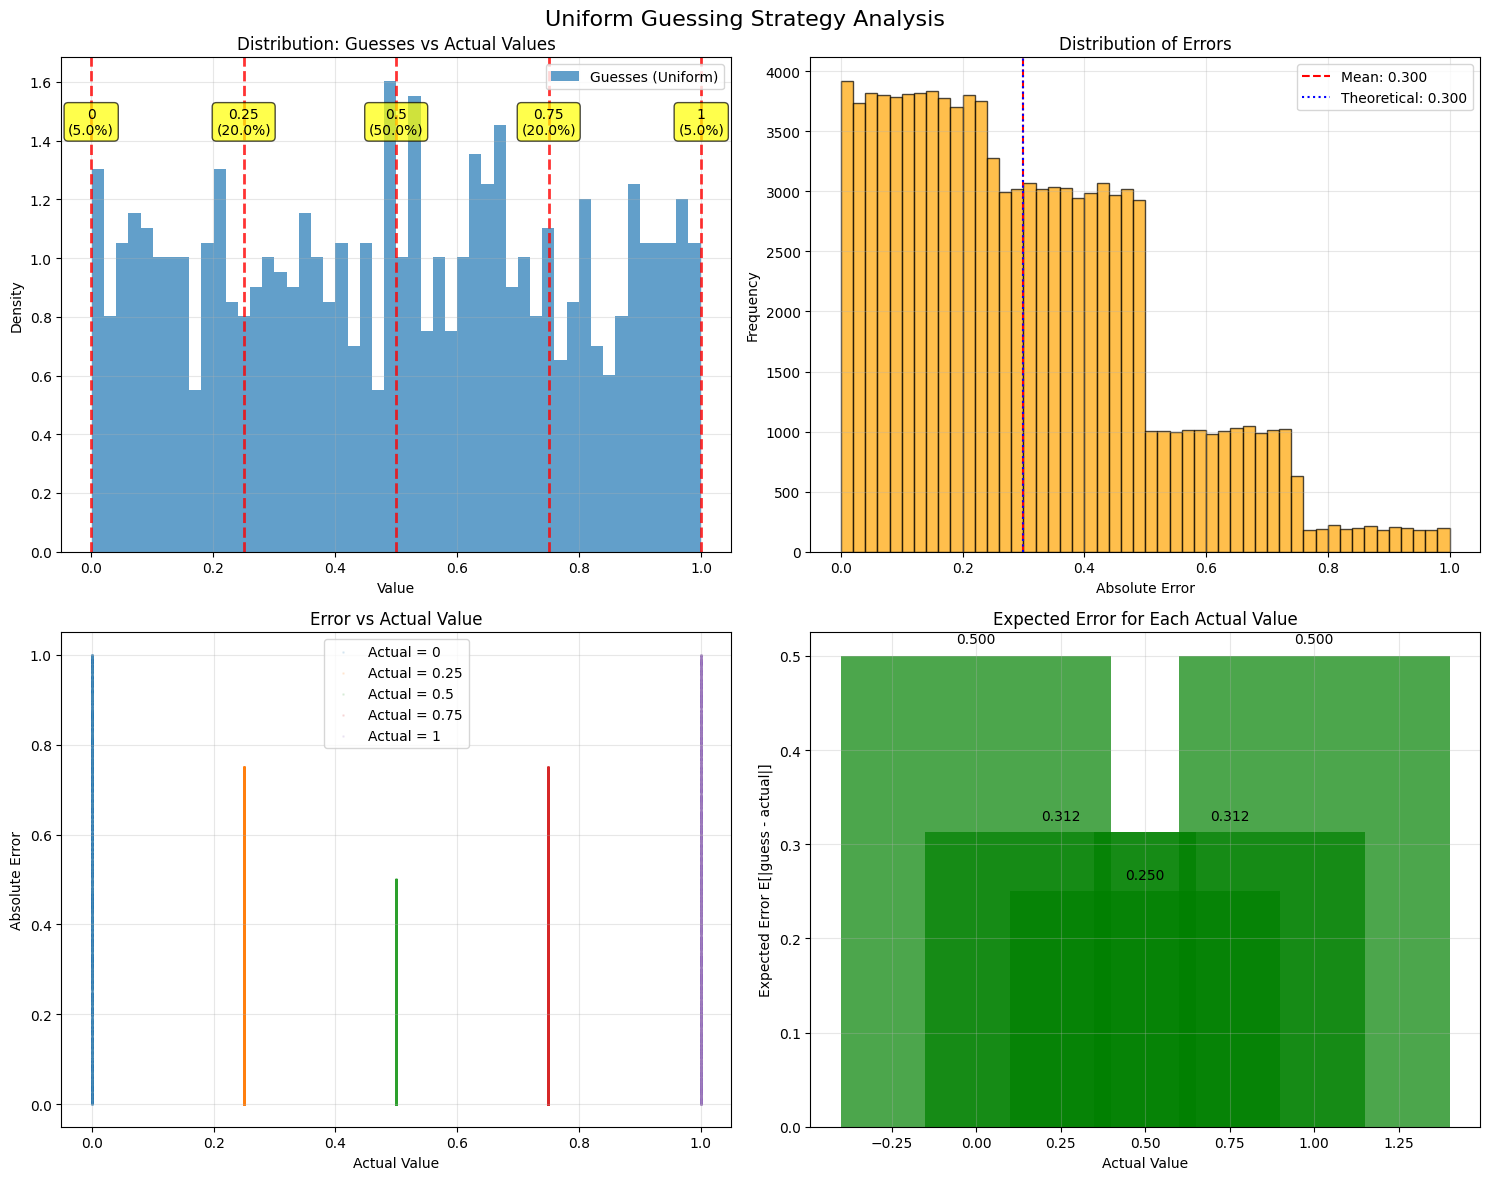

In [27]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Uniform Guessing Strategy Analysis', fontsize=16)

# Plot 1: Distribution of guesses vs actual values
axes[0, 0].hist(guesses[:1000], bins=50, alpha=0.7, label='Guesses (Uniform)', density=True)
for val, prob in values.items():
    axes[0, 0].axvline(x=val, color='red', linestyle='--', linewidth=2, alpha=0.8)
    axes[0, 0].text(val, axes[0, 0].get_ylim()[1]*0.9, f'{val}\n({prob*100}%)', 
                   ha='center', va='top', fontsize=10, 
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
axes[0, 0].set_title('Distribution: Guesses vs Actual Values')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Error distribution
axes[0, 1].hist(errors, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].axvline(x=np.mean(errors), color='red', linestyle='--', 
                  label=f'Mean: {np.mean(errors):.3f}')
axes[0, 1].axvline(x=theoretical_error, color='blue', linestyle=':', 
                  label=f'Theoretical: {theoretical_error:.3f}')
axes[0, 1].set_title('Distribution of Errors')
axes[0, 1].set_xlabel('Absolute Error')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Error vs Actual Value
for actual_val in values.keys():
    mask = actual_values_sampled == actual_val
    if np.any(mask):
        axes[1, 0].scatter([actual_val] * np.sum(mask), errors[mask], 
                          alpha=0.1, s=1, label=f'Actual = {actual_val}')

axes[1, 0].set_title('Error vs Actual Value')
axes[1, 0].set_xlabel('Actual Value')
axes[1, 0].set_ylabel('Absolute Error')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Expected error for each actual value
actual_vals = list(values.keys())
expected_errors_per_value = []
for val in actual_vals:
    if val == 0 or val == 1:
        expected_errors_per_value.append(0.5)
    else:
        expected_errors_per_value.append(val**2 - val + 0.5)

axes[1, 1].bar(actual_vals, expected_errors_per_value, alpha=0.7, color='green')
axes[1, 1].set_title('Expected Error for Each Actual Value')
axes[1, 1].set_xlabel('Actual Value')
axes[1, 1].set_ylabel('Expected Error E[|guess - actual|]')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for i, (val, err) in enumerate(zip(actual_vals, expected_errors_per_value)):
    axes[1, 1].text(val, err + 0.01, f'{err:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [28]:
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

# Break down the error by actual value
print("\nError analysis by actual value:")
for actual_val in sorted(values.keys()):
    mask = actual_values_sampled == actual_val
    if np.any(mask):
        errors_for_this_val = errors[mask]
        print(f"\nActual value {actual_val} (probability {values[actual_val]*100}%):")
        print(f"  Observed mean error: {np.mean(errors_for_this_val):.4f}")
        print(f"  Theoretical error:   {actual_val**2 - actual_val + 0.5 if actual_val not in [0, 1] else 0.5:.4f}")
        print(f"  Number of samples:   {len(errors_for_this_val)}")
        print(f"  Error std dev:       {np.std(errors_for_this_val):.4f}")

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"\nUniform Guessing Strategy (0 to 1) Performance:")
print(f"  Average Error: {theoretical_error:.4f}")
print(f"\nThis means:")
print(f"  - On average, your guess will be off by {theoretical_error:.4f} units")
print(f"  - This is {theoretical_error*100:.1f}% of the full range [0,1]")
print(f"\nWhy this result makes sense:")
print(f"  - Most probability mass is at 0.5 (50% chance)")
print(f"  - Uniform guessing spreads equally across [0,1]")
print(f"  - Expected error for guessing against 0.5 is {0.5**2 - 0.5 + 0.5:.3f}")
print(f"  - This dominates the overall expected error due to high probability")

print(f"\nFormula used:")
print(f"  E[error] = Σ P(actual=a) × E[|uniform_guess - a|]")
print(f"  Where E[|U(0,1) - a|] = a² - a + 0.5 for a ∈ (0,1)")
print(f"  And E[|U(0,1) - 0|] = E[|U(0,1) - 1|] = 0.5")


DETAILED ANALYSIS

Error analysis by actual value:

Actual value 0 (probability 5.0%):
  Observed mean error: 0.5002
  Theoretical error:   0.5000
  Number of samples:   4959
  Error std dev:       0.2888

Actual value 0.25 (probability 20.0%):
  Observed mean error: 0.3162
  Theoretical error:   0.3125
  Number of samples:   20087
  Error std dev:       0.2209

Actual value 0.5 (probability 50.0%):
  Observed mean error: 0.2496
  Theoretical error:   0.2500
  Number of samples:   50009
  Error std dev:       0.1444

Actual value 0.75 (probability 20.0%):
  Observed mean error: 0.3121
  Theoretical error:   0.3125
  Number of samples:   20074
  Error std dev:       0.2199

Actual value 1 (probability 5.0%):
  Observed mean error: 0.4951
  Theoretical error:   0.5000
  Number of samples:   4871
  Error std dev:       0.2882

SUMMARY

Uniform Guessing Strategy (0 to 1) Performance:
  Average Error: 0.3000

This means:
  - On average, your guess will be off by 0.3000 units
  - This is 30